In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns = ["buying","maint","doors","persons","lug_boot","safety","Class Values"]
data = pd.read_csv('car_evaluation.csv',header=None,names=columns)
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


### Exploratory Data Analysis

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.tail()

,buying,maint,doors,persons,lug_boot,safety,Class Values
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
Class Values    0
dtype: int64

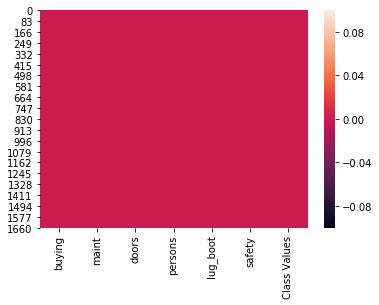

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [7]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [12]:
data.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
Class Values    object
dtype: object

#### Lets Check the Uniqueness

In [8]:
data['buying'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
data['maint'].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
data['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
data['persons'].unique()

array(['2', '4', 'more'], dtype=object)

In [13]:
data['lug_boot'].unique()

array(['small', 'med', 'big'], dtype=object)

In [14]:
data['safety'].unique()

array(['low', 'med', 'high'], dtype=object)

In [15]:
data['Class Values'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

#### Lets Convert the dataset into Numeric(boolean) Format

In [17]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [18]:
#For all those columns who has 3 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==3):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [19]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,vhigh,vhigh,2,0,2,1,unacc
1,vhigh,vhigh,2,0,2,2,unacc
2,vhigh,vhigh,2,0,2,0,unacc
3,vhigh,vhigh,2,0,1,1,unacc
4,vhigh,vhigh,2,0,1,2,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,2,1,2,good
1724,low,low,5more,2,1,0,vgood
1725,low,low,5more,2,0,1,unacc
1726,low,low,5more,2,0,2,good


In [22]:
#For all those columns who has 4 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==4):#Unique values
        le_anima = preprocessing.LabelEncoder()
        data[cols] = le_anima.fit_transform(data[cols])

In [23]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [24]:
data.dtypes

buying          int32
maint           int32
doors           int32
persons         int64
lug_boot        int64
safety          int64
Class Values    int32
dtype: object

In [25]:
data = pd.DataFrame(data=data)
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [26]:
data.shape

(1728, 7)

In [27]:
data.dtypes

buying          int32
maint           int32
doors           int32
persons         int64
lug_boot        int64
safety          int64
Class Values    int32
dtype: object

In [28]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,Class Values
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [29]:
dfcor = data.corr()
dfcor

,buying,maint,doors,persons,lug_boot,safety,Class Values
buying,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
Class Values,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


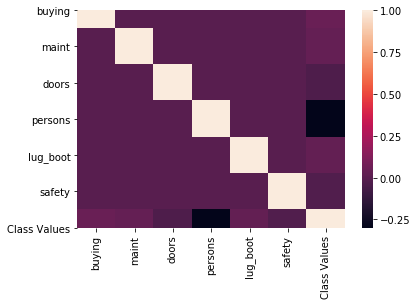

In [30]:
sns.heatmap(dfcor)

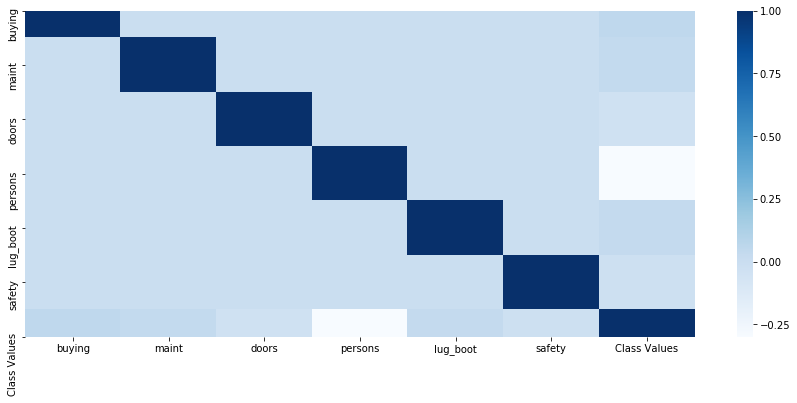

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

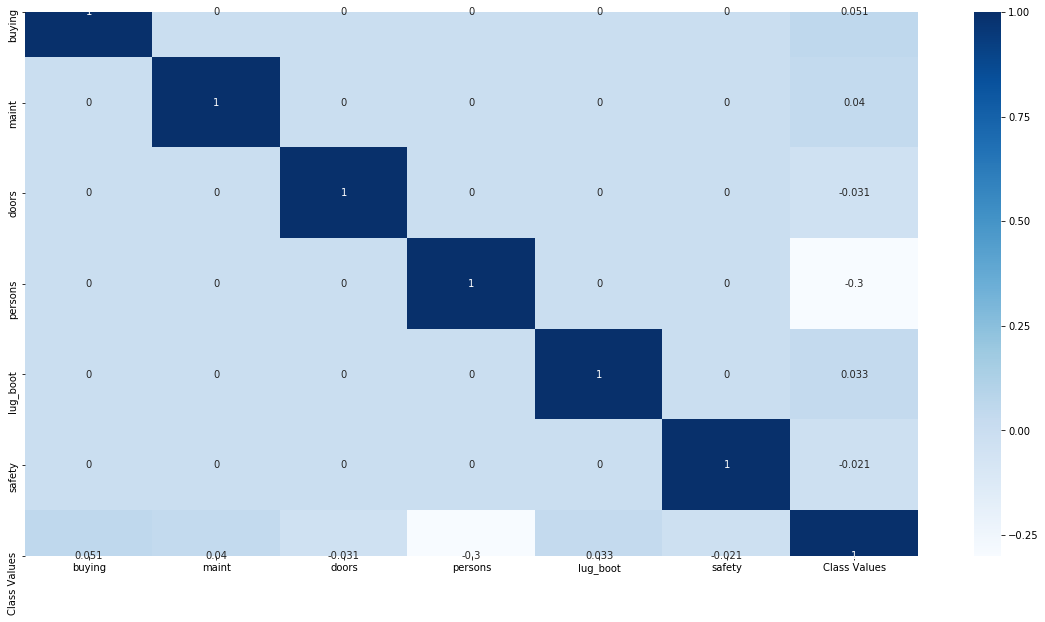

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [34]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(1728, 7)
(1728, 7)


#### Checking Skewness and Removing it

In [35]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

buying          0.000000
maint           0.000000
doors           0.000000
persons         0.000000
lug_boot        0.000000
safety          0.000000
Class Values   -0.988383
dtype: float64

In [36]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [37]:
#Lets Again Check the Skewness
data.skew()

buying          0.000000
maint           0.000000
doors           0.000000
persons         0.000000
lug_boot        0.000000
safety          0.000000
Class Values   -0.988383
dtype: float64

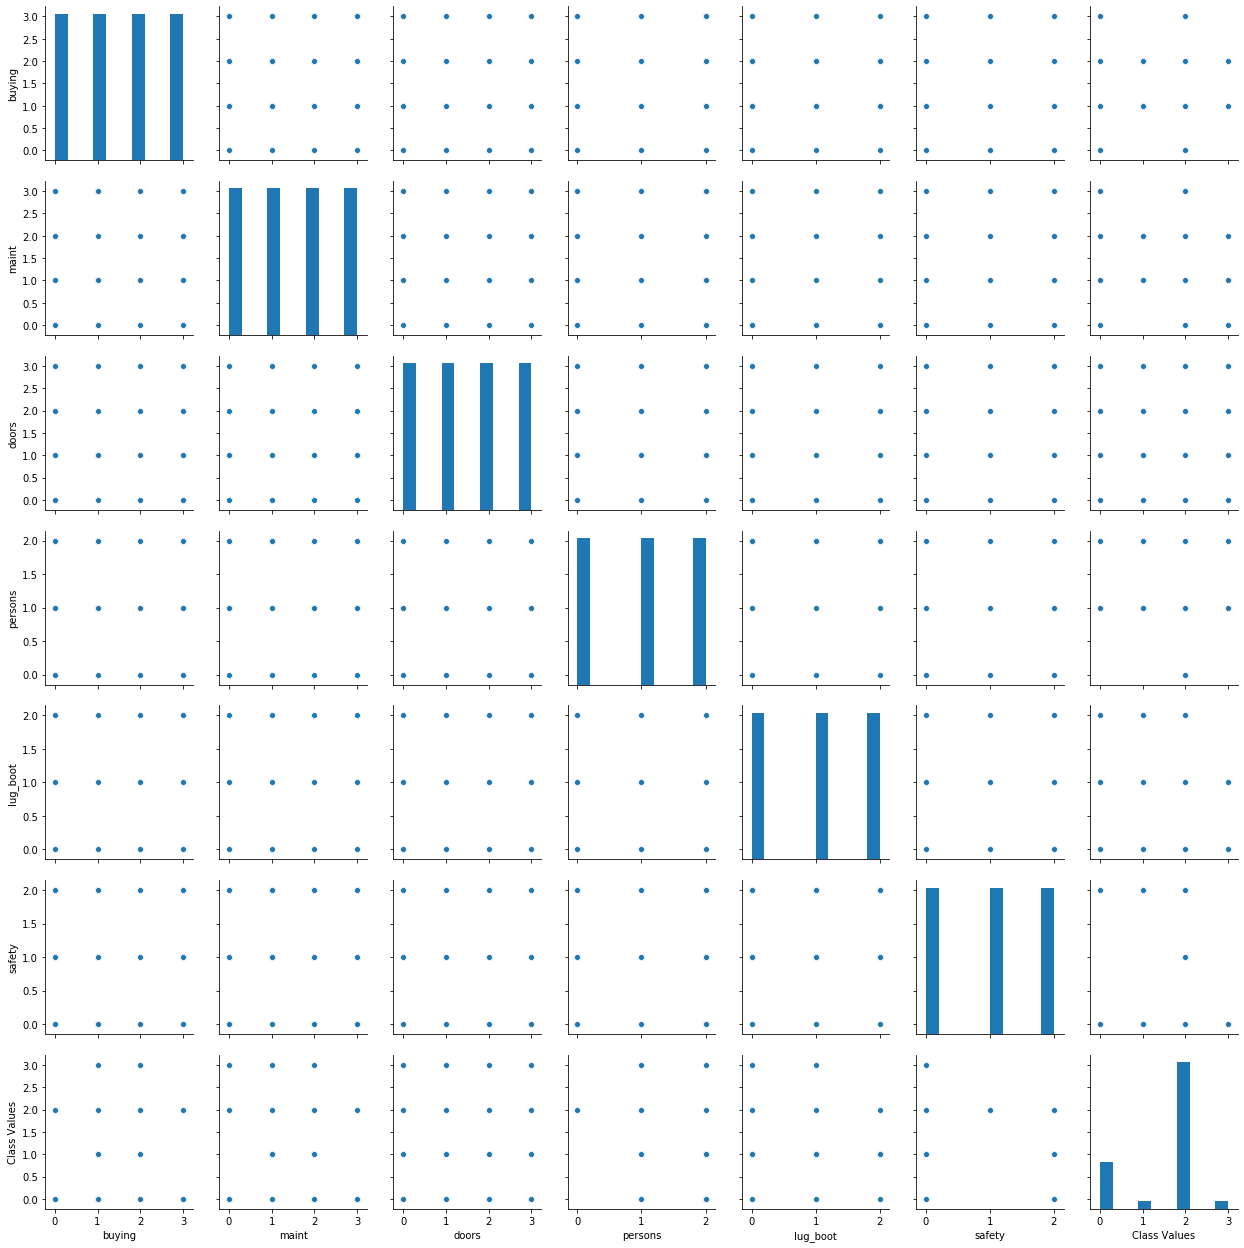

In [38]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### Plotting Boxplot through Iteration

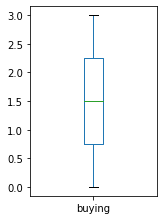

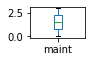

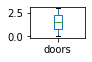

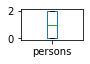

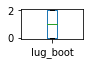

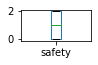

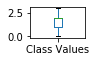

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

### Plotting Displot Through Iteration

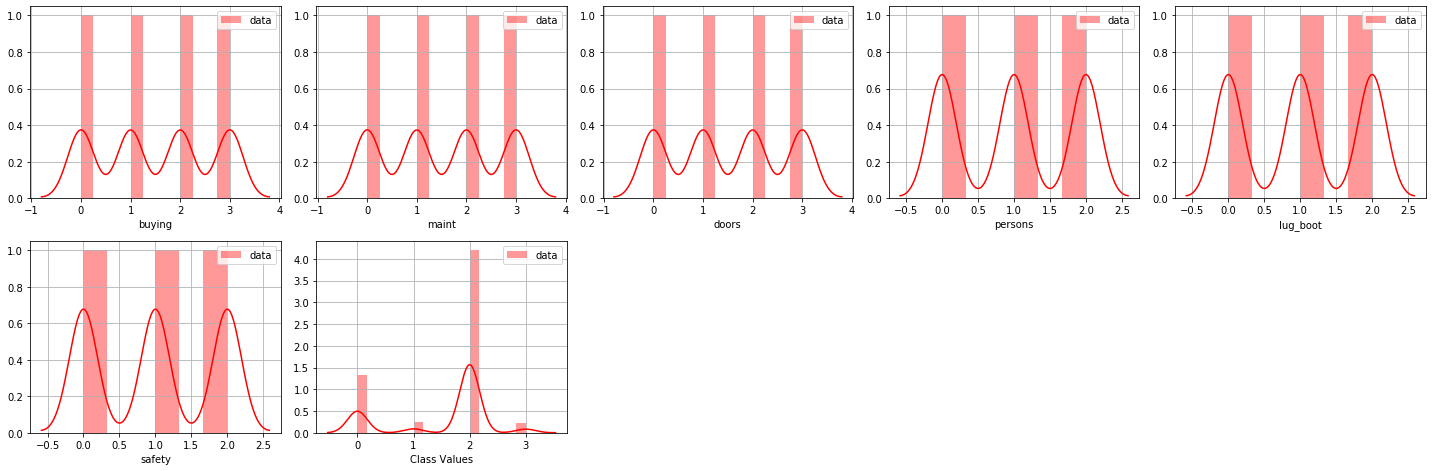

In [40]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### LinePlot

In [41]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Class Values'],
      dtype='object')

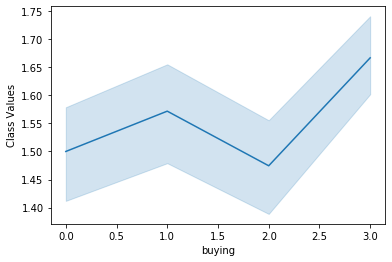

In [42]:
#Lets check the how buying is changing with respect to Class Values
sns.lineplot(data["buying"],data["Class Values"])
plt.show()

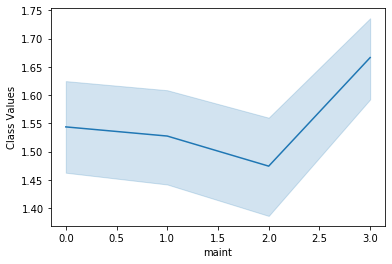

In [43]:
#Lets check the how maint is changing with respect to Class Values
sns.lineplot(data["maint"],data["Class Values"])
plt.show()

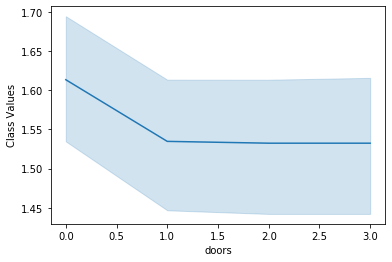

In [44]:
#Lets check the how doors is changing with respect to Class Values
sns.lineplot(data["doors"],data["Class Values"])
plt.show()

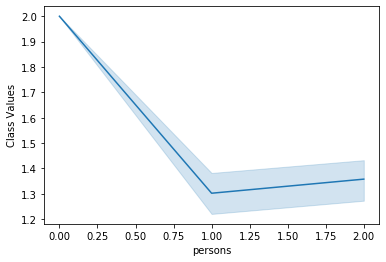

In [45]:
#Lets check the how persons is changing with respect to Class Values
sns.lineplot(data["persons"],data["Class Values"])
plt.show()

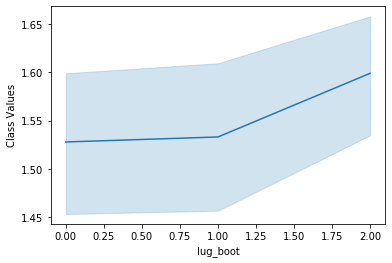

In [46]:
#Lets check the how lug_boot is changing with respect to Class Values
sns.lineplot(data["lug_boot"],data["Class Values"])
plt.show()

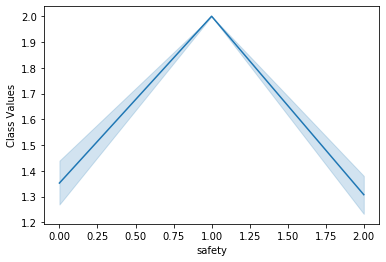

In [47]:
#Lets check the how lug_boot is changing with respect to Class Values
sns.lineplot(data["safety"],data["Class Values"])
plt.show()

### Plotting Data using Scatter Plot

In [48]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'Class Values'],
      dtype='object')

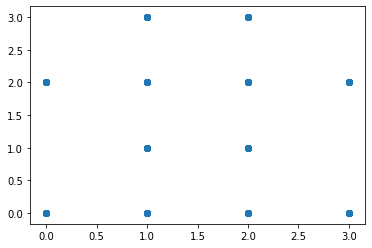

In [49]:
plt.scatter(data['buying'],data['Class Values'])

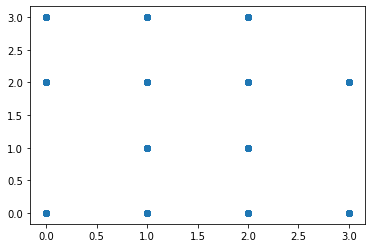

In [50]:
plt.scatter(data['maint'],data['Class Values'])

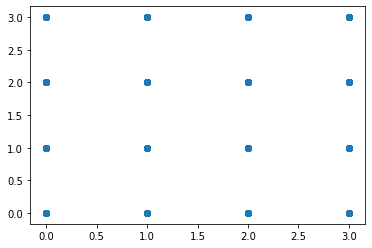

In [51]:
plt.scatter(data['doors'],data['Class Values'])

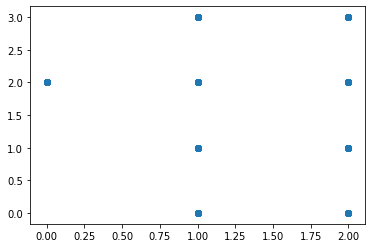

In [52]:
plt.scatter(data['persons'],data['Class Values'])

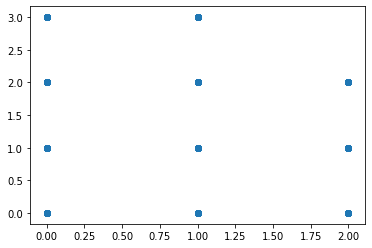

In [53]:
plt.scatter(data['lug_boot'],data['Class Values'])

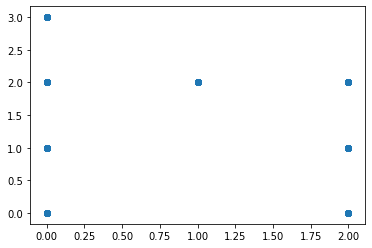

In [54]:
plt.scatter(data['safety'],data['Class Values'])

### Column Plot

In [55]:
collist = data.columns.values
ncols=12
nrows=10

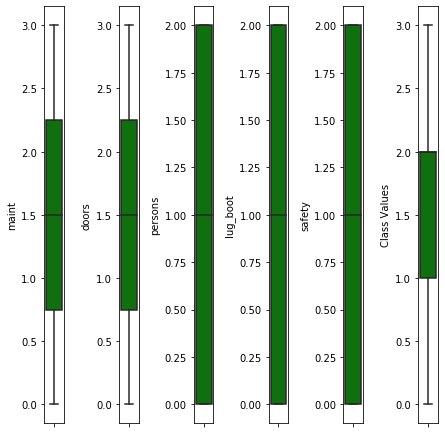

In [56]:
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data[collist[i]],color='green',orient='v')
    plt.tight_layout()

#### Separating X and Y Variable

In [57]:
data

,buying,maint,doors,persons,lug_boot,safety,Class Values
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [58]:
X = data.drop("Class Values", axis=1)

In [59]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [60]:
Y = data["Class Values"]
Y

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: Class Values, Length: 1728, dtype: int32

In [61]:
Y.shape

(1728,)

In [62]:
Y = Y.values.reshape(-1,1)

In [63]:
Y

array([[2],
       [2],
       [2],
       ...,
       [2],
       [1],
       [3]])

In [64]:
Y.shape

(1728, 1)

In [65]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [66]:
train_X.shape

(1347, 6)

In [67]:
test_X.shape

(381, 6)

In [68]:
train_Y.shape

(1347, 1)

In [69]:
test_Y.shape

(381, 1)

#### Applying Logistic Regression

In [70]:
lg=LogisticRegression()

In [71]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred=lg.predict(test_X)
print(pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 3 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0
 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 0]


In [73]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.7322834645669292


In [74]:
print(confusion_matrix(test_Y,pred))

[[ 19   0  60   2]
 [  2   0  12   0]
 [ 14   0 260   0]
 [  8   0   4   0]]


In [75]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.44      0.23      0.31        81
           1       0.00      0.00      0.00        14
           2       0.77      0.95      0.85       274
           3       0.00      0.00      0.00        12

    accuracy                           0.73       381
   macro avg       0.30      0.30      0.29       381
weighted avg       0.65      0.73      0.68       381



### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [76]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.6621069378664425


In [77]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.6730859052856065


### Grid Search Cross Validation for Logistic Regression

In [78]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7000742390497402


In [79]:
lg2=LogisticRegression(C=0.01,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.7349081364829396


### Boost the Dataset by AdaBoost and GradiantBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.7334818114328137
[0 2 2 0 2 2 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2 2 2 2 2 0 3 2 0 3 2 2 2 2
 2 2 2 2 2 2 2 2 3 0 2 0 2 0 0 2 2 2 2 0 2 3 2 0 0 0 2 3 2 2 2 2 2 0 2 0 2
 2 2 0 3 2 2 2 3 2 2 0 0 0 2 2 2 0 0 2 3 2 0 2 2 2 2 2 0 2 2 2 2 2 0 0 2 0
 0 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 3 2 2 3 2 2 0 0 2 0 0 0 3 2 2 2 2
 0 2 2 2 0 2 2 2 3 2 2 0 2 2 2 3 0 2 2 3 2 2 2 2 0 2 2 0 2 2 2 2 3 3 2 2 0
 0 0 0 2 0 0 0 2 0 3 0 2 2 2 0 0 2 3 0 3 2 2 2 2 0 0 2 0 0 2 0 2 2 2 2 2 0
 0 0 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 3 2 2 2 2 0 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 0 2 2 2 2 3 2 2 2 3 2 3 2
 3 2 3 2 2 0 2 2 0 0 2 2 2 0 2 2 2 3 2 2 2 2 0 0 0 2 0 0 2 2 2 2 2 3 2 0 2
 2 2 3 2 2 2 2 0 2 0 0]


0.7585301837270341

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.9896065330363771
[0 2 2 2 0 0 1 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 3 1 0 0 2 2 2 2 2 2 2 0 2 0 2 1 0 0 2 0 2 2 2 2 2 0 2 1 2
 2 2 2 3 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 3 2 0 2 2 0 2 2 0 2 2 2 2 2 2 1 0 0
 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 2 1
 0 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 3 2 2 1 1 2 0 0 0 0 2 2 2 2
 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 1 3 2 2 2
 0 2 0 2 0 1 2 2 2 3 2 2 2 2 0 2 2 3 0 3 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 2 1
 0 0 0 2 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 0 2 2 2 2 0 2 0 0 3 2 2 2 2 2 2 3 2 2 2 2 2 0 2 2 2 2 3 2 2 2 3 2 0 2
 0 2 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 1 2 2 1 2 0 2 0 2 0 2 2 2
 2 2 0 2 2 2 2 0 2 0 0]


0.989501312335958

### Boosting though GradientBoost Regressor By using Parameters

In [82]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.6358091693014779
R2 sq:  0.6358091693014779
Mean squared error: 0.28
Test Variance score: 0.61


### Lets Visualize the Goodness of the Prediction

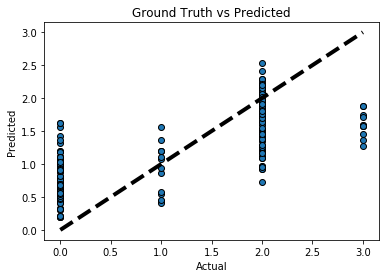

In [84]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [85]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.7217847769028871
[[  1   0  80   0]
 [  0   0  14   0]
 [  0   0 274   0]
 [  0   0  12   0]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02        81
           1       0.00      0.00      0.00        14
           2       0.72      1.00      0.84       274
           3       0.00      0.00      0.00        12

    accuracy                           0.72       381
   macro avg       0.43      0.25      0.22       381
weighted avg       0.73      0.72      0.61       381



### Multinomial NB by using Crossval Score

In [86]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.69230769 0.69230769 0.68376068 0.69230769 0.7008547  0.70689655
 0.68965517 0.69827586 0.69827586 0.71052632 0.7079646  0.7079646
 0.7079646  0.7079646  0.7079646 ]
Mean Scores 0.7003327489635569
Standard deviation 0.008281709919367941
Y Prediction values
[2 2 2 ... 2 2 0]


array([[   6,    0,  374,    4],
       [   0,    0,   69,    0],
       [  13,    0, 1195,    2],
       [   4,    0,   61,    0]], dtype=int64)

### Pediction using Support Vector Machine

In [87]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.9422572178477691
[[ 72   0   8   1]
 [  9   3   0   2]
 [  1   0 273   0]
 [  1   0   0  11]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        81
           1       1.00      0.21      0.35        14
           2       0.97      1.00      0.98       274
           3       0.79      0.92      0.85        12

    accuracy                           0.94       381
   macro avg       0.91      0.75      0.77       381
weighted avg       0.94      0.94      0.93       381



### Support Vector Machine by using Crossval Score

In [88]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.69075145 0.80346821 0.63872832 0.82080925 0.89534884]
Mean Scores 0.7698212125285657
Standard Deviation 0.09265684897639309
Y Prediction values
[2 2 2 ... 2 1 3]


0.7696759259259259

### Use GridSearchCV for Support Vector Machine

In [89]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.693, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.695, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.696, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.693, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.693, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.696, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.693, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.695, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.944, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.982, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.982, total=   0.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.982, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.973, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.973, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.982, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    5.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [90]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [91]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00       274
           3       1.00      1.00      1.00        12

    accuracy                           1.00       381
   macro avg       1.00      1.00      1.00       381
weighted avg       1.00      1.00      1.00       381



#### Boosting through Support Vector Classifier

In [92]:
#from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME.R')

#abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1,algorithm='SAMME')

# Train Adaboost Classifer
modelsvboost = abc.fit(train_X,train_Y)

#Predict the response for test dataset
y_pred = modelsvboost.predict(test_X)


print("Accuracy:",metrics.accuracy_score(test_Y, y_pred))

Accuracy: 0.7191601049868767


### Prediction Using DecisionTreeClassifier

In [93]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.9816272965879265
[[ 77   1   3   0]
 [  1  13   0   0]
 [  2   0 272   0]
 [  0   0   0  12]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        81
           1       0.93      0.93      0.93        14
           2       0.99      0.99      0.99       274
           3       1.00      1.00      1.00        12

    accuracy                           0.98       381
   macro avg       0.97      0.97      0.97       381
weighted avg       0.98      0.98      0.98       381



### DecisionTreeClassifier by using Crossval Score

In [94]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.33466488 0.57454024 0.54981184 0.71270266 0.77624778]
Mean Scores 0.5895934815345345
Standard Deviation 0.15283551049924293
Y Prediction values
[2 2 2 ... 2 1 3]


array([[ 218,   50,   77,   39],
       [   9,   53,    4,    3],
       [ 144,    3, 1063,    0],
       [  14,   13,    0,   38]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    4.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [96]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 75, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=75,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [97]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        81
           1       0.93      0.93      0.93        14
           2       0.99      0.98      0.98       274
           3       1.00      1.00      1.00        12

    accuracy                           0.97       381
   macro avg       0.96      0.96      0.96       381
weighted avg       0.97      0.97      0.97       381



### Boost Decision Tree Classifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [99]:
predictions = dtbclassifier.predict(test_X)
predictions

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 2, 0, 0, 2, 3, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 3, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 3, 0, 3,
       2, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,

In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.7874015748031497


In [101]:
confusion_matrix(test_Y, predictions)

array([[ 40,   2,  34,   5],
       [  0,   7,   6,   1],
       [ 25,   8, 241,   0],
       [  0,   0,   0,  12]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [102]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.9291338582677166
[[ 68   0  13   0]
 [  5   7   2   0]
 [  1   1 272   0]
 [  2   0   3   7]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        81
           1       0.88      0.50      0.64        14
           2       0.94      0.99      0.96       274
           3       1.00      0.58      0.74        12

    accuracy                           0.93       381
   macro avg       0.93      0.73      0.80       381
weighted avg       0.93      0.93      0.92       381



### KNN Nearest Neighbor by using Crossval Score 

In [103]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.64942529 0.66666667 0.70689655 0.68390805 0.71676301 0.70348837
 0.76162791 0.80813953 0.84302326 0.85380117]
Mean Scores 0.7393739796862571
Standard Deviation 0.06954717809778632
Y Prediction values
[2 2 2 ... 2 0 3]
y_pred.shape (1728,)


array([[132,  31, 206,  15],
       [ 47,  11,  11,   0],
       [208,  40, 953,   9],
       [ 38,   4,   8,  15]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7935574722597734, 0.7587764890431158, 0.8470420334284647, 0.8440568756750431, 0.9020203496842966, 0.9086496145582389, 0.915382789750884, 0.9027614156501033, 0.8975033014743221, 0.8782516036978454, 0.8670726000339363, 0.8529682014529005, 0.8315384362177672, 0.8337996863580432, 0.8226597937387441, 0.8137195201995862, 0.8055645432351988, 0.8025785687785332, 0.8011079010304932, 0.7966846757013097, 0.7915205506594318, 0.798890314175605, 0.799664471791868, 0.7914773788522218, 0.7893144279881168, 0.7877942438136474, 0.7855497436744103, 0.7743712314886793, 0.7758969435791244, 0.7684178249548287]


In [106]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [107]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [108]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [109]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [110]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 7}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')


In [111]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        81
           1       1.00      0.64      0.78        14
           2       0.96      1.00      0.98       274
           3       1.00      0.83      0.91        12

    accuracy                           0.95       381
   macro avg       0.96      0.83      0.89       381
weighted avg       0.95      0.95      0.95       381



#### Bagging of KNN Nearest Neighbor 

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [113]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [114]:
predictions = baggingknn.predict(test_X)
predictions

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,

In [115]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8451443569553806


In [116]:
confusion_matrix(test_Y, predictions)

array([[ 49,   0,  32,   0],
       [ 11,   0,   3,   0],
       [  3,   0, 271,   0],
       [  8,   0,   2,   2]], dtype=int64)

### Prediction Using RandomForest Classification

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.9553805774278216
[[ 76   2   3   0]
 [  1  13   0   0]
 [ 11   0 263   0]
 [  0   0   0  12]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        81
           1       0.87      0.93      0.90        14
           2       0.99      0.96      0.97       274
           3       1.00      1.00      1.00        12

    accuracy                           0.96       381
   macro avg       0.93      0.96      0.94       381
weighted avg       0.96      0.96      0.96       381



### RandomForestClassifier Using Cross_Val_Score

In [118]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.75862069 0.72413793 0.88505747 0.72988506 0.92485549 0.91860465
 0.8372093  0.86627907 0.98255814 0.90643275]
Mean Scores 0.8533640552083476
Standard Deviation 0.08439772749689652
Y Prediction values
[2 2 2 ... 2 1 3]
y_pred.shape (1728,)


array([[ 196,   45,  128,   15],
       [  29,   37,    0,    3],
       [ 117,    7, 1086,    0],
       [  16,    2,    0,   47]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [119]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [120]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=90, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [121]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions)) 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        81
           1       1.00      0.86      0.92        14
           2       0.99      0.99      0.99       274
           3       0.86      1.00      0.92        12

    accuracy                           0.98       381
   macro avg       0.95      0.95      0.95       381
weighted avg       0.98      0.98      0.98       381



#### Bagging of Random Forest Classifier 

In [122]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [123]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [124]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [125]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.7716535433070866


In [126]:
confusion_matrix(test_Y, predictionsrf)

array([[ 19,   0,  62,   0],
       [  3,   0,  11,   0],
       [  2,   0, 272,   0],
       [  3,   0,   6,   3]], dtype=int64)

#### NOTE::Among all models gridsv gives the Highest accuracy(1%) so we are going to save this model

In [127]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(gridsv,'Car_Evaluation.pkl')

['Car_Evaluation.pkl']